# PA 3: Association Analysis - Apriori Algorithm

# Student Details
Name : Kundana Vaka

ID : 1001827398

# Submission Instructions
Step 1: Create a folder and name it 'lastname_firstname_yourNetID_PA3'

Step 2: Rename this submission file as 'lastname_firstname_yourNetID_PA3.ipynb' and place it inside the folder 'lastname_firstname_yourNetID_PA3'

Step 3: Rename the updated dataset file 'dataset.csv' and place it inside the folder 'lastname_firstname_yourNetID_PA3'

Step 4: Your submission folder should include ONLY the following files:

*	apriory.py,
*	lastname_firstname_yourNetID_PA3.ipynb,
*	datasets
*	toyDS.csv

Step 5: Zip this folder and submit it on canvas Your final submission folder name should be 'lastname_firstname_yourNetID_PA3.ZIP'


# Programming Assignment Details
Before you start:

Be familiar with the algorithm and with the dataset.
If you use external sources make sure that you cite them, and be specific!
Make sure that your code is running before you upload your submission file. TA will not debug your code.
Start early!

For this assignment, you will have to use:

Jupyter notebook,
the 'Random Shopping cart' dataset [01],
and the Apriori Algorithm (apriory.py)[02]. Note that the apriory.py file is modified to run with Python 3.


# - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - -
- - - - - - - - -


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
return false;
}


<IPython.core.display.Javascript object>

In [1]:
# Import your Libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import csv
import apriori

ScreenShot of the toyDS.csv


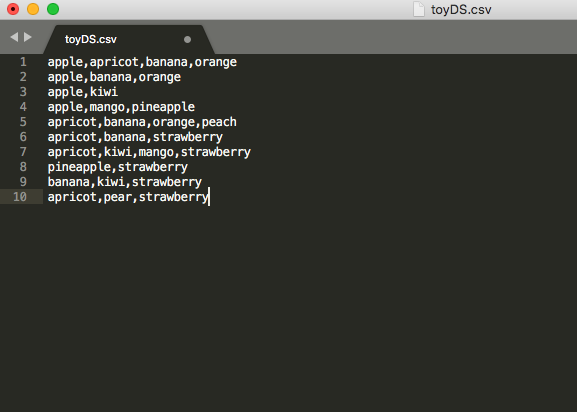

In [3]:
from IPython.display import Image
print ('ScreenShot of the toyDS.csv') 
Image("SampleScreen01.png")

# Task 1: DataSet Preprocess

In [4]:
# # # # # # # # #	Code for Task 1 # # # # # # # # #
#reading the dataset
df = pd.read_csv("Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,5/1/2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,1/2/2015,whole milk


In [5]:
#Discarding the date attribute
df = df.drop('Date', axis = 1)

In [6]:
#printing the dataframe to check if the Date column is dropped
print(df)

       Member_number        itemDescription
0               1808         tropical fruit
1               2552             whole milk
2               2300              pip fruit
3               1187       other vegetables
4               3037             whole milk
...              ...                    ...
38760           4471          sliced cheese
38761           2022                  candy
38762           1097               cake bar
38763           1510  fruit/vegetable juice
38764           1521               cat food

[38765 rows x 2 columns]


In [7]:
#grouping the items based on the Member_number and retaining only the set of items
transactions = [a[1]['itemDescription'].tolist() for a in list(df.groupby('Member_number'))]  #https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
#converting transactions into DataFrame
df = DataFrame(transactions)

In [8]:
df.drop_duplicates()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,soda,canned beer,sausage,sausage,whole milk,whole milk,pickled vegetables,misc. beverages,semi-finished bread,hygiene articles,...,None,None,None,None,None,None,None,None,None,None
1,frankfurter,frankfurter,beef,sausage,whole milk,soda,curd,white bread,whole milk,soda,...,None,None,None,None,None,None,None,None,None,None
2,tropical fruit,butter milk,butter,frozen vegetables,sugar,specialty chocolate,whole milk,other vegetables,None,None,...,None,None,None,None,None,None,None,None,None,None
3,sausage,root vegetables,rolls/buns,detergent,frozen meals,rolls/buns,dental care,rolls/buns,None,None,...,None,None,None,None,None,None,None,None,None,None
4,other vegetables,pip fruit,root vegetables,canned beer,rolls/buns,whole milk,other vegetables,hygiene articles,whole milk,whole milk,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,dessert,salty snack,rolls/buns,misc. beverages,bottled beer,tropical fruit,bottled water,decalcifier,semi-finished bread,soda,...,None,None,None,None,None,None,None,None,None,None
3894,tropical fruit,white wine,whole milk,curd,grapes,canned beer,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3895,rolls/buns,curd,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3896,bottled water,butter milk,tropical fruit,berries,berries,other vegetables,semi-finished bread,herbs,whipped/sour cream,other vegetables,...,None,None,None,None,None,None,None,None,None,None


In [9]:
#exporting the modified dataset into a new file named dataset.csv
with open("dataset.csv",'w',newline='') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f, dialect= 'excel')
    for j in range(len(df)):
        data= []
        data.append(df.values[j][0])  
    write.writerows(transactions)
f.close() 
    
    
#https://appdividend.com/2020/12/10/how-to-convert-python-list-to-csv-file/

In [10]:
# # #	Solution	# # #
#reading the newly created dataset.csv using pandas and printing the first 7 transactions
newdf = pd.read_csv('dataset.csv', sep='delimiter',header=None)
print(newdf.head(7))

                                                   0
0  soda,canned beer,sausage,sausage,whole milk,wh...
1  frankfurter,frankfurter,beef,sausage,whole mil...
2  tropical fruit,butter milk,butter,frozen veget...
3  sausage,root vegetables,rolls/buns,detergent,f...
4  other vegetables,pip fruit,root vegetables,can...
5  whipped/sour cream,rolls/buns,margarine,rolls/...
6  whole milk,frankfurter,chicken,frankfurter,who...


<ipython-input-10-94e64efe7878>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  newdf = pd.read_csv('dataset.csv', sep='delimiter',header=None)


# Task 2: Run apriory.py and Evaluate Results
In this task, you have to find how you will be able to execute and print apriory results by making use only the apriory.py. In other words "DO NOT USE ANY OTHER LIBRARY FOR TASK 2!!!".

(*) For those that are not familiar with python and coding this could be a quite demanding task.

You will have to execute apriori algorithm "3" times for different combinations of support and confidence. Print the results of apriory for 'dataset.csv' by making use ONLY the provided methods.

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way.


In [11]:
print ('# # # # # # # # #	Code for Task 2, Case:1 # # # # # # # # #') 
print ('Case 1 (minimum support=0.1 and minimum confidence=0.2)')
print ('Case 1 Reasoning:\nIn Case:1 we gave high support and confidence compared to other two cases.\nWe can see that if the support and confidence is high then fewer items and rules have been generated.\nThe algorithm worked faster in this case because it had to generate fewer rules and items.') 
print ('Case 1 Output:')
%run apriori.py -f DATASET.csv -s 0.1 -c 0.2

# # # # # # # # #	Code for Task 2, Case:1 # # # # # # # # #
Case 1 (minimum support=0.1 and minimum confidence=0.2)
Case 1 Reasoning:
In Case:1 we gave high support and confidence compared to other two cases.
We can see that if the support and confidence is high then fewer items and rules have been generated.
The algorithm worked faster in this case because it had to generate fewer rules and items.
Case 1 Output:

------------ITEMS-----------------
item: ('chicken',) , 0.101
item: ('frozen vegetables',) , 0.103
item: ('whole milk', 'sausage') , 0.107
item: ('yogurt', 'rolls/buns') , 0.111
item: ('bottled water', 'whole milk') , 0.112
item: ('whole milk', 'root vegetables') , 0.113
item: ('coffee',) , 0.115
item: ('tropical fruit', 'whole milk') , 0.116
item: ('margarine',) , 0.117
item: ('beef',) , 0.120
item: ('soda', 'rolls/buns') , 0.120
item: ('yogurt', 'other vegetables') , 0.120
item: ('curd',) , 0.121
item: ('soda', 'other vegetables') , 0.124
item: ('fruit/vegetable juice',) , 

In [12]:
print ('# # # # # # # # #	Code for Task 2, Case:2 # # # # # # # # #') 
print ('Case 2 (minimum support=0.07 and minimum confidence=0.07)')
print ('Case 2 Reasoning:\nIn Case:2 we gave less support and confidence values as compared to that of Case:1.\nIn this case we can observe that as we reduce the support and confidence the number of items and rules are increased.') 
print ('Case 2 Output:')
%run apriori -f DATASET.csv -s 0.07 -c 0.07

# # # # # # # # #	Code for Task 2, Case:2 # # # # # # # # #
Case 2 (minimum support=0.07 and minimum confidence=0.07)
Case 2 Reasoning:
In Case:2 we gave less support and confidence values as compared to that of Case:1.
In this case we can observe that as we reduce the support and confidence the number of items and rules are increased.
Case 2 Output:

------------ITEMS-----------------
item: ('domestic eggs', 'whole milk') , 0.070
item: ('yogurt', 'root vegetables') , 0.072
item: ('pastry', 'other vegetables') , 0.072
item: ('citrus fruit', 'rolls/buns') , 0.072
item: ('yogurt', 'whole milk', 'other vegetables') , 0.072
item: ('pip fruit', 'other vegetables') , 0.072
item: ('whole milk', 'newspapers') , 0.072
item: ('shopping bags', 'other vegetables') , 0.073
item: ('cream cheese ',) , 0.075
item: ('yogurt', 'sausage') , 0.075
item: ('tropical fruit', 'yogurt') , 0.076
item: ('onions',) , 0.076
item: ('bottled water', 'soda') , 0.076
item: ('soda', 'sausage') , 0.077
item: ('citrus fr

In [13]:
print ('# # # # # # # # #	Code for Task 2, Case:3 # # # # # # # # #') 
print ('Case 3 (minimum support=0.05 and minimum confidence=0.05)')
print ('Case 3 Reasoning:\nThis case has the least support and confidence compared to the other two cases and in turn we can see that we got the more rules than the other cases.\nWe can also observe that alorithm took quite more time compared to other cases to display the output because it had to generate a large number of itemsets and rules.\nFrom this we can understand that the number of itemsets and rules generated depends on the confidence and support.') 
print ('Case 3 Output:')
%run apriori -f DATASET.csv -s 0.05 -c 0.05

# # # # # # # # #	Code for Task 2, Case:3 # # # # # # # # #
Case 3 (minimum support=0.05 and minimum confidence=0.05)
Case 3 Reasoning:
This case has the least support and confidence compared to the other two cases and in turn we can see that we got the more rules than the other cases.
We can also observe that alorithm took quite more time compared to other cases to display the output because it had to generate a large number of itemsets and rules.
From this we can understand that the number of itemsets and rules generated depends on the confidence and support.
Case 3 Output:

------------ITEMS-----------------
item: ('chicken', 'whole milk') , 0.050
item: ('curd', 'rolls/buns') , 0.050
item: ('margarine', 'other vegetables') , 0.050
item: ('other vegetables', 'whole milk', 'sausage') , 0.050
item: ('tropical fruit', 'whole milk', 'other vegetables') , 0.051
item: ('beef', 'other vegetables') , 0.051
item: ('frankfurter', 'soda') , 0.051
item: ('curd', 'other vegetables') , 0.052
item: